<a href="https://colab.research.google.com/github/Prannov/Hacktoberfest2021_awesome-projects/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Prannov Jamadagni

Objective: To perform classification analysis on Iris dataset with two classification algorithms and compare the accuracy.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading iris dataset
iris_data = pd.read_csv("Iris.csv")

In [ ]:
#showing the first 5 rows of data
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#checking the information of columns and the data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Id column is not required for the prediction of the species
iris_data.drop('Id', axis = 1, inplace = True)

In [ ]:
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

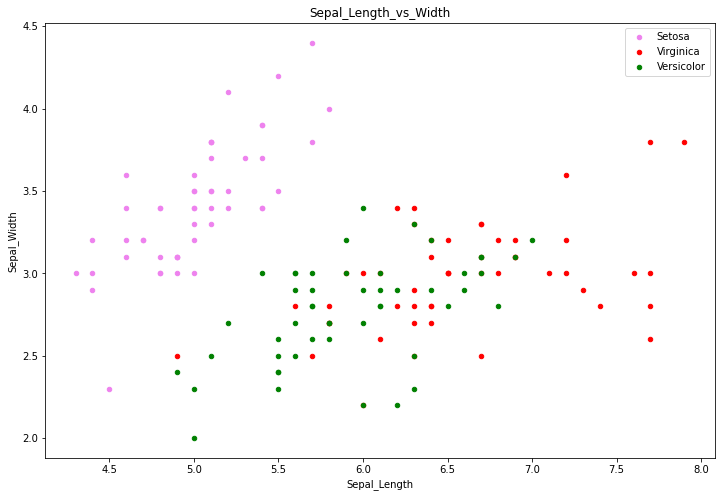

In [ ]:
#visualising the features related to species with sepal length and width
fig = iris_data[iris_data.Species=="Iris-setosa"].plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm", color = "violet", label = "Setosa")
iris_data[iris_data.Species=="Iris-virginica"].plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm", color = "red", label = "Virginica", ax = fig)
iris_data[iris_data.Species=="Iris-versicolor"].plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm", color = "green", label = "Versicolor", ax = fig)
fig.set_xlabel("Sepal_Length")
fig.set_ylabel("Sepal_Width")
fig.set_title("Sepal_Length_vs_Width")
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

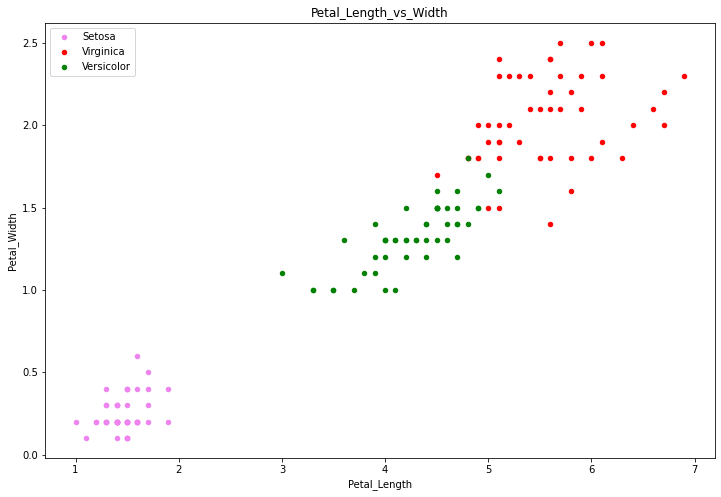

In [ ]:
#visualising the features related to species with petal length and width
fig = iris_data[iris_data.Species=="Iris-setosa"].plot(kind = "scatter", x = "PetalLengthCm", y = "PetalWidthCm", color = "violet", label = "Setosa")
iris_data[iris_data.Species=="Iris-virginica"].plot(kind = "scatter", x = "PetalLengthCm", y = "PetalWidthCm", color = "red", label = "Virginica", ax = fig)
iris_data[iris_data.Species=="Iris-versicolor"].plot(kind = "scatter", x = "PetalLengthCm", y = "PetalWidthCm", color = "green", label = "Versicolor", ax = fig)
fig.set_xlabel("Petal_Length")
fig.set_ylabel("Petal_Width")
fig.set_title("Petal_Length_vs_Width")
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
#importing sklearn packages for classification algorithms
from sklearn.tree import DecisionTreeClassifier #using decision tree classifier for classification
from sklearn.model_selection import train_test_split
from sklearn import svm #using support vector machines for classifications
from sklearn import metrics

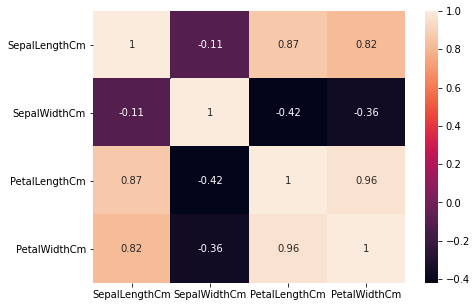

In [ ]:
#checking the correlation of the different features
plt.figure(figsize=(7,5))
sns.heatmap(iris_data.corr(), annot=True)
plt.show()

After checking the data correlation, it is found that the relation between sepal width and length is minimum and relation between petal length and width is maximum

In [ ]:
#splitting the data
features = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
label = iris_data.Species

In [ ]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
label.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.3)

In [ ]:
#using Support Vector Machine algoritm
model = svm.SVC()
model.fit(features_train, label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction = model.predict(features_test)
#checking the accuracy of the algorithm
print("The accuracy of SVM is", metrics.accuracy_score(prediction, label_test))
#using confusion_matrix
metrics.confusion_matrix(prediction, label_test)

The accuracy of SVM is 0.9555555555555556


array([[14,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 16]])

In [ ]:
#using Decision Tree Classifier algorithm
model_log = DecisionTreeClassifier()
model_log.fit(features_train, label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_log = model_log.predict(features_test)
#checking the accuracy of the algorithm
print("The accuracy of Decision Tree is", metrics.accuracy_score(prediction_log, label_test))
#using confusion_matrix
metrics.confusion_matrix(prediction_log, label_test)

The accuracy of Decision Tree is 1.0


array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 18]])

Observations: Of the two Classification algorithms used, the accuracy of the Decission Tree Classifier is 1.0 and that of SVM is 0.95.

1. It can be analyzed that the random state is set 0 in splitting training and testing the data and therefore there is difference in the accuracy.
2. The Decision Tree Classifier yields better prediction compared to the Support Vector Machine for classifying species of iris dataset.